# BASICS 03 - HOTS in PyTorch

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
%cd ../hots
import tonic, torch, os
from timesurface import timesurface
from network import network
from utils import get_loader

print(f'Tonic version installed -> {tonic.__version__}')

print(f'Number of GPU devices available: {torch.cuda.device_count()}')
for N_gpu in range(torch.cuda.device_count()):
    print(f'GPU {N_gpu+1} named {torch.cuda.get_device_name(N_gpu)}')

/home/antoine/homhots/hotsline/hots
Tonic version installed -> 1.0.15
Number of GPU devices available: 1
GPU 1 named GeForce RTX 2080 Ti


## Initialization of the network

In [15]:
trainset = True
transform = tonic.transforms.NumpyAsType(int)
dataset = tonic.datasets.NMNIST(save_to='../../Data/', train=trainset, transform=transform)
loader = get_loader(dataset, kfold = 300, shuffle=True)
#get_dataset_info(dataset, properties = ['time', 'mean_isi', 'nb_events']);
print(f'number of samples in the dataset: {len(loader)}')

number of samples in the dataset: 200


In [16]:
name = 'homeohots'
homeo = True
timestr = '2022-04-01'
dataset_name = 'nmnist'

Rz = (2, 4, 8)
N_neuronz = (4, 8, 16)
tauz = (5e3, 5e4, 5e5)

network = network(name, dataset_name, timestr, dataset.sensor_size, nb_neurons = N_neuronz, tau = tauz, R = Rz, homeo = homeo)

## Unsupervised clustering

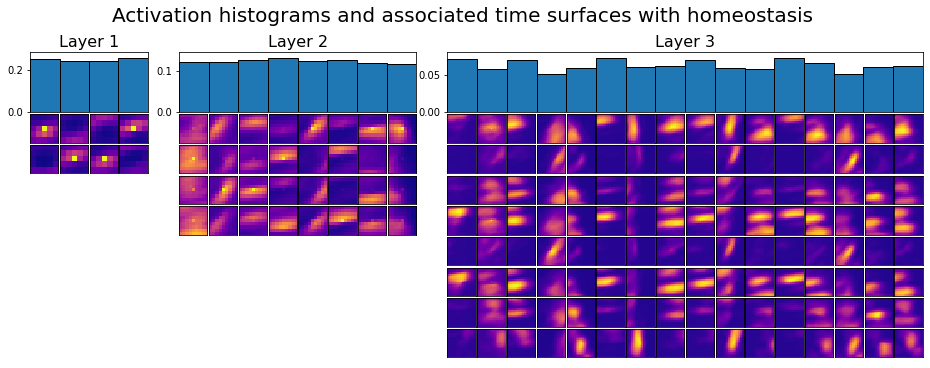

In [19]:
if not os.path.exists('../Records/'):
    os.mkdir('../Records/')
    os.mkdir('../Records/networks/')
filtering_threshold = [2*Rz[L] for L in range(len(Rz))]
path = '../Records/networks/'+network.name+'.pkl'
if not os.path.exists(path):
    network.clustering(loader, dataset.ordering, filtering_threshold)
network.plotlayers();

## Coding of the training set

In [20]:
loader = get_loader(dataset, kfold = None, shuffle=True)
network.coding(loader, dataset.ordering, dataset.classes, filtering_threshold, training=trainset)

this dataset have already been processed, check at: 
 ../Records/output/train/2022-04-01_nmnist_homeohots_True_(4, 8, 16)_(5000.0, 50000.0, 500000.0)_(2, 4, 8)_60000_(None, None)/


## Coding of the testing set

In [21]:
trainset = False
dataset = tonic.datasets.NMNIST(save_to='../../Data/', train=trainset, transform=transform)
loader = get_loader(dataset, kfold = None, shuffle=True)
network.coding(loader, dataset.ordering, dataset.classes, filtering_threshold, training=trainset)

this dataset have already been processed, check at: 
 ../Records/output/test/2022-04-01_nmnist_homeohots_True_(4, 8, 16)_(5000.0, 50000.0, 500000.0)_(2, 4, 8)_10000_(None, None)/


## Histogram classification

In [23]:
from utils import make_histogram_classification, HOTS_Dataset
num_sample_test = 10000
num_sample_train = 60000
jitter = (None, None)

train_path = f'../Records/output/train/{network.name}_{num_sample_train}_{jitter}/'
test_path = f'../Records/output/test/{network.name}_{num_sample_test}_{jitter}/'

testset = HOTS_Dataset(test_path, dataset.sensor_size, transform=tonic.transforms.NumpyAsType(int))
trainset = HOTS_Dataset(train_path, dataset.sensor_size, transform=tonic.transforms.NumpyAsType(int))

In [24]:
score = make_histogram_classification(trainset, testset, N_neuronz[-1]) 
print(score)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:07<00:00, 1397.34it/s]

0.1103


## TODO: 
- add plot of the loss
- add the MLR